In [2]:
import numpy as np
import torch 
from model import PINNs
import pandas as pd
from utils import charge_data
import json
import matplotlib.pyplot as plt
from plot_results import  plot_loss_decompose, plot_points, plot_loss
from model import PINNs
from utils import charge_data
import json
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import numpy as np
import time as time
import pandas as pd
from geometry import RectangleWithoutCylinder

In [3]:
param_adim = {"V": 1.0, "L": 0.025, "rho": 1.2}

In [4]:
num = 6
case = 2

In [5]:
def find_cl_data(num, case, time_init, T, param_adim, r=0.025/2):
    df = pd.read_csv('data/'+ f"model_{num}_case_{case}_border.csv")
    df_modified = df.loc[
            (df["Time"] > time_init)
            & (df["Time"] < time_init + 15 * T)
            & (df["Points:2"] == 0.0)
            & (df["Points:0"] ** 2 + df["Points:1"] ** 2 < 1.1* (0.025 / 2) ** 2),
            :,
        ].copy()
    X_theta = np.empty((df_modified.shape[0], 3))
    X_theta[:, 0] = time_init + ((df_modified['Time'].to_numpy() - time_init) % T )    #X_full[masque_theta][:, 2] 
    X_theta[:, 1] = np.atan2(df_modified['Points:1'].to_numpy(), df_modified['Points:0'].to_numpy())    #np.atan2(X_full[masque_theta][:, 1] * mean_std['y_std'] + mean_std['y_mean'], X_full[masque_theta][:, 0] * mean_std['x_std'] + mean_std['x_mean'])
    X_theta[:, 2] = -df_modified['Stress:1'].to_numpy() / np.sin(X_theta[:, 1])   #U_full[masque_theta][:, 2]
    portance = np.empty(np.unique(X_theta[:, 0]).shape[0])
    for nb, time_ in enumerate(np.unique(X_theta[:, 0])):
        masque_time = X_theta[:, 0] == time_
        indices = np.argsort(X_theta[masque_time][:, 1])[::-1]
        d_theta = X_theta[masque_time][indices][:-1, 1] - X_theta[masque_time][indices][1:, 1]
        portance[nb] = -np.sum(X_theta[masque_time][indices][1:, 2] * np.sin(X_theta[masque_time][indices][1:, 1])*d_theta * r)
    time_predict = np.unique(X_theta[:, 0])    # (X_full[masque_theta][:, 2].unique()* mean_std['t_std'] + mean_std['t_mean']) * (param_adim['L']/ param_adim['V'])
    return time_predict, portance / (0.5 * param_adim['rho'] * param_adim['V']**2 * 2 * r)
    

In [6]:
def true_cl(num, case, time_init, time_max):
    """
    Args:
        num (int): Le numéro du modèle
        case (int): Le numéro du case
        time_init (float): le temps initial 
        time_max (float): le temps max


    Returns:
        time (np.array):  les valeurs de temps
        cl (np.array): la valeur de cl à ces temps
    """
    df = pd.read_csv(f'results_Cl/model_{num}_case_{case}/Cl.csv', index_col=False)
    df_modified = df[((df.iloc[:, 2] > time_init) & (df.iloc[:, 2] < time_max))]
    time = df_modified.iloc[:, 2].to_numpy()
    cl = df_modified.iloc[:, 1].to_numpy()
    return time, cl


In [8]:
time_init=6.

num:1, case:1


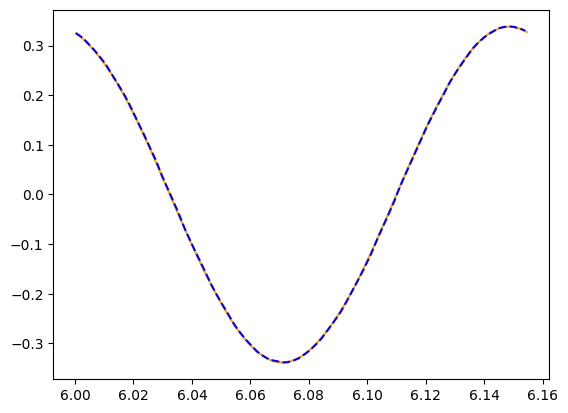

num:1, case:2


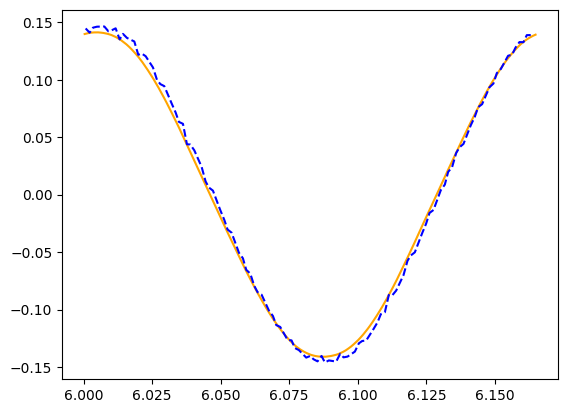

num:2, case:1


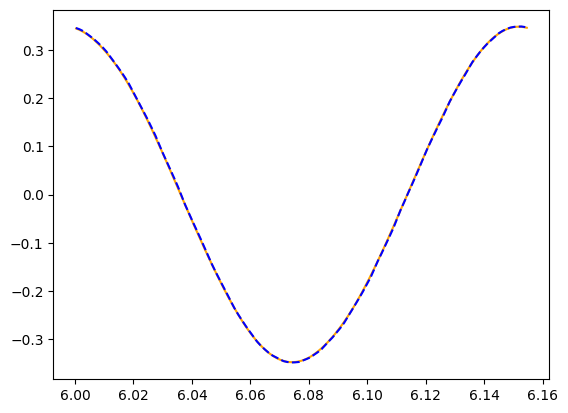

num:2, case:2


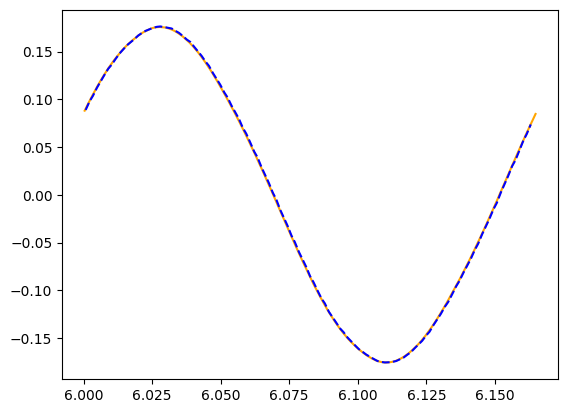

num:3, case:1


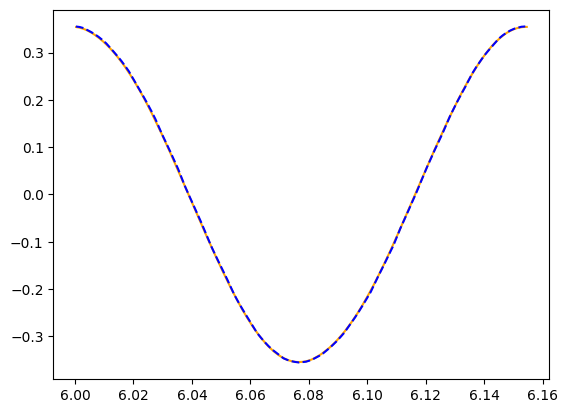

num:3, case:2


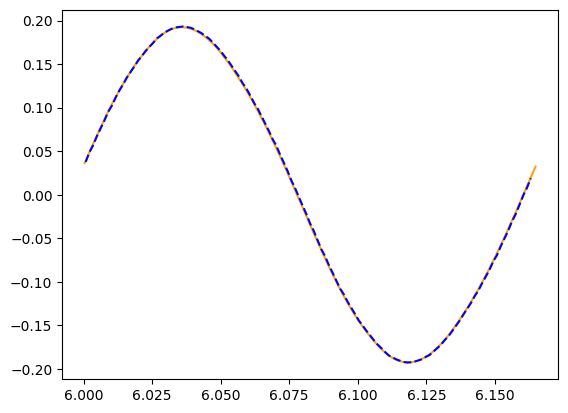

num:4, case:1


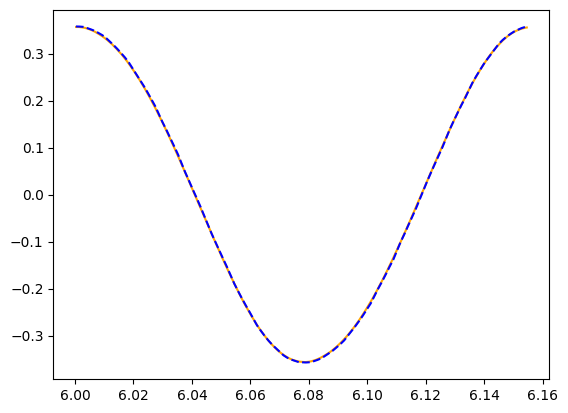

num:4, case:2


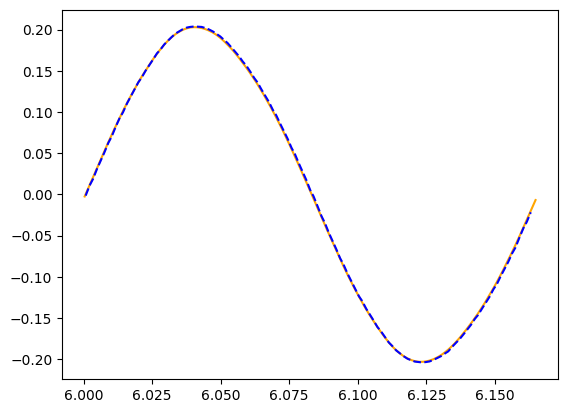

num:5, case:1


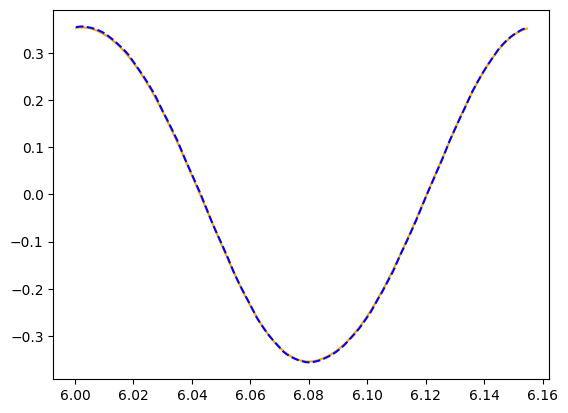

num:5, case:2


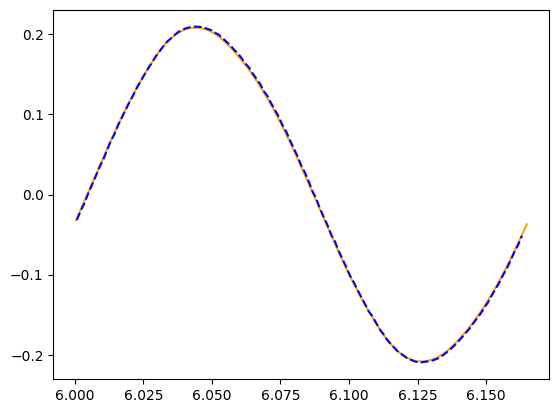

num:6, case:1


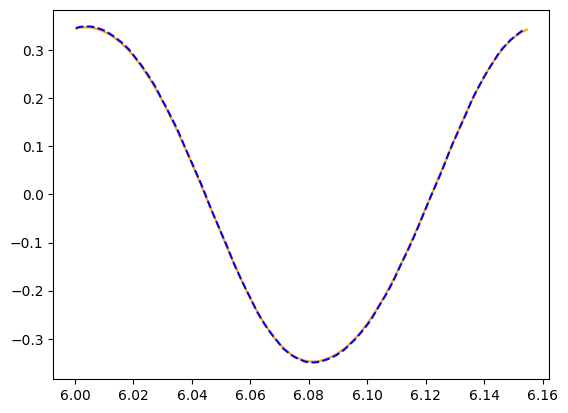

num:6, case:2


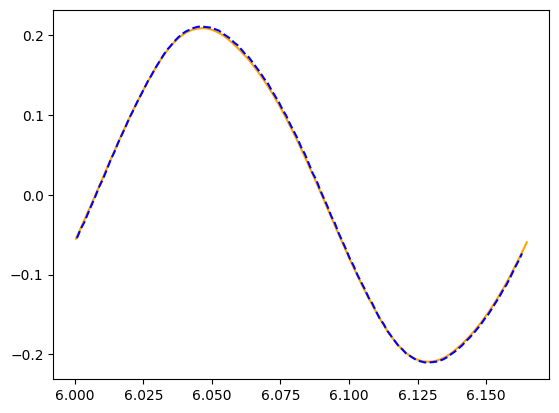

num:7, case:1


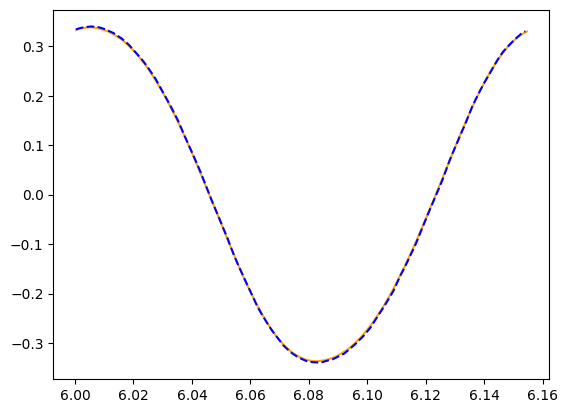

num:7, case:2


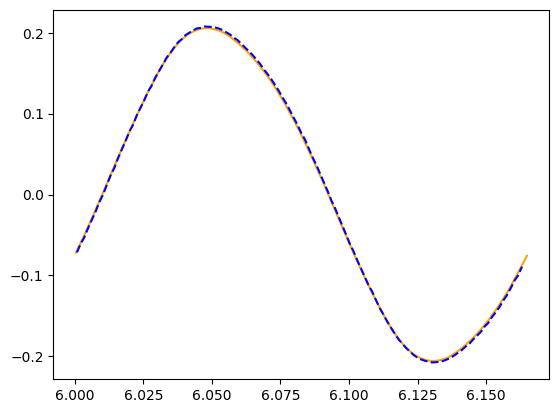

num:8, case:1


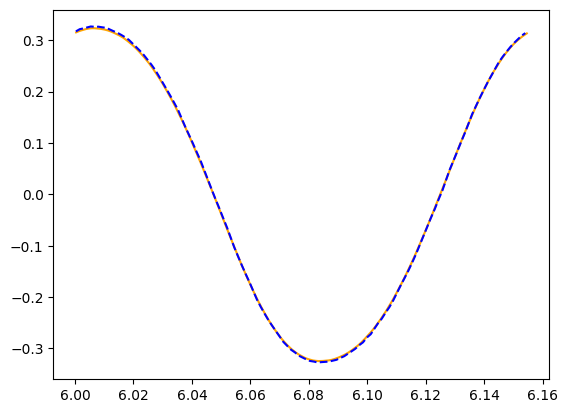

num:8, case:2


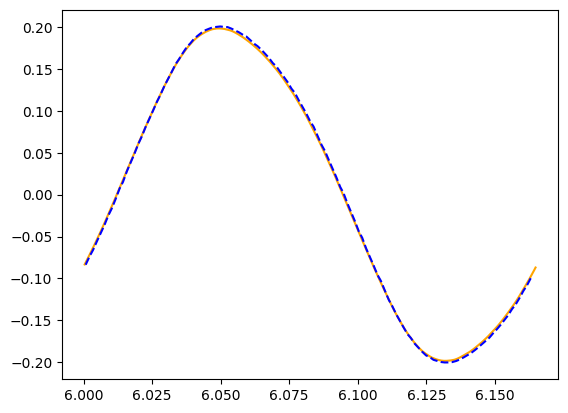

num:9, case:1


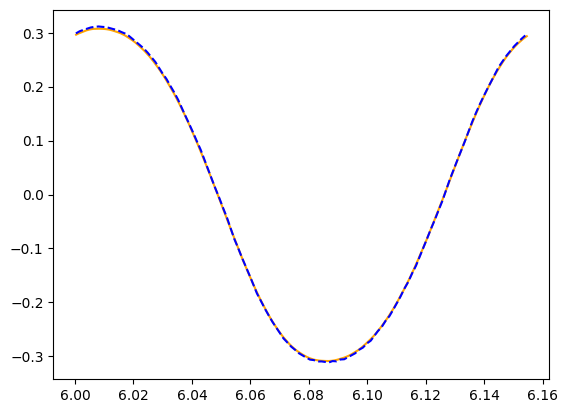

num:9, case:2


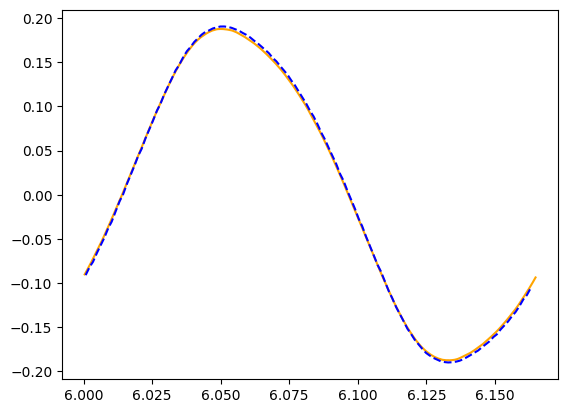

num:10, case:1


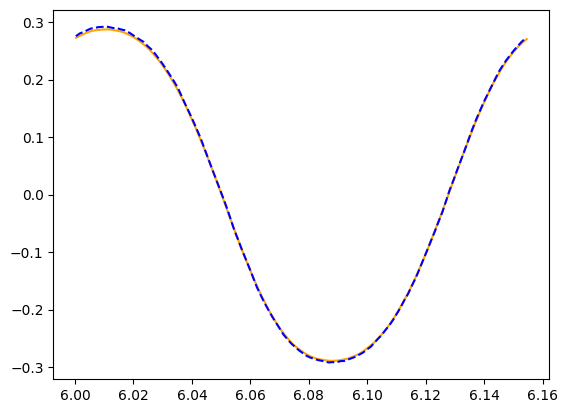

num:10, case:2


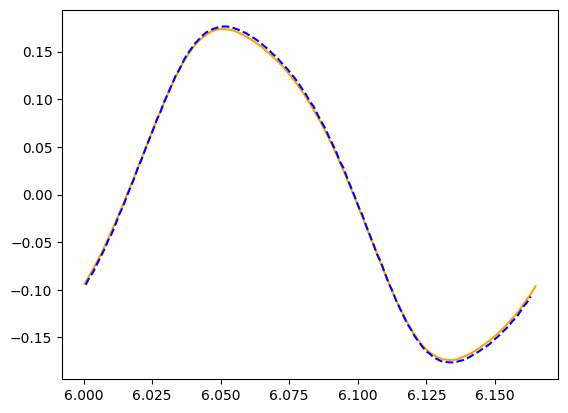

num:11, case:1


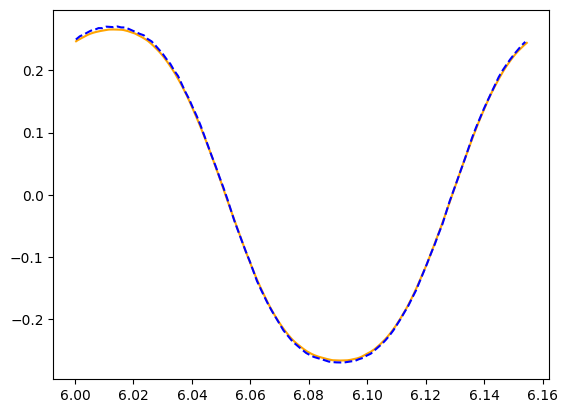

num:11, case:2


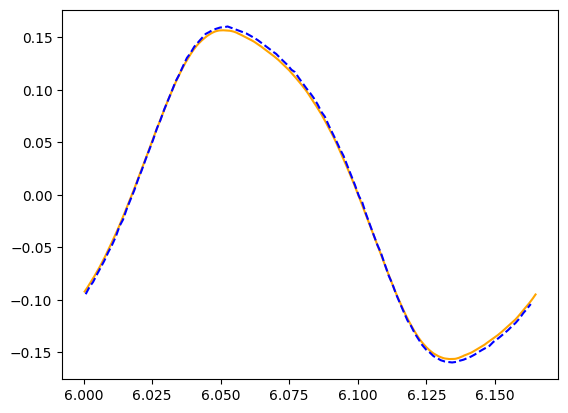

num:12, case:1


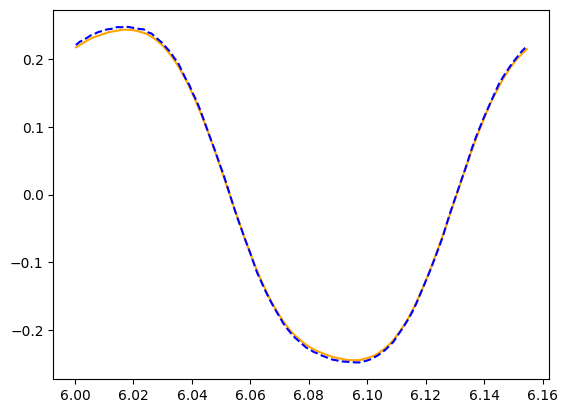

num:12, case:2


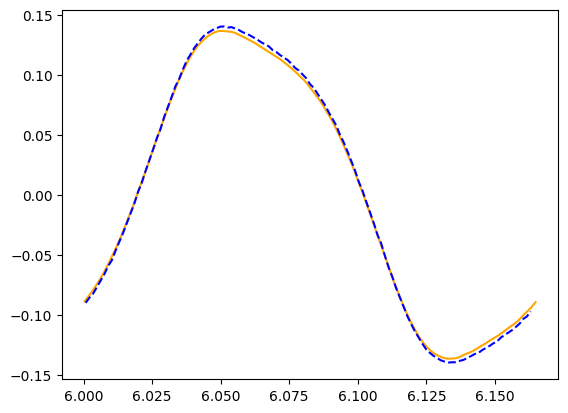

num:13, case:1


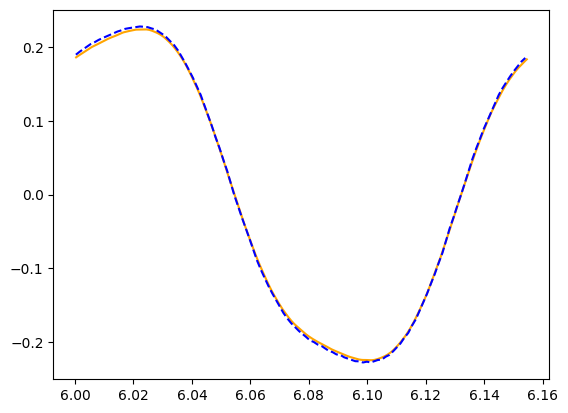

num:13, case:2


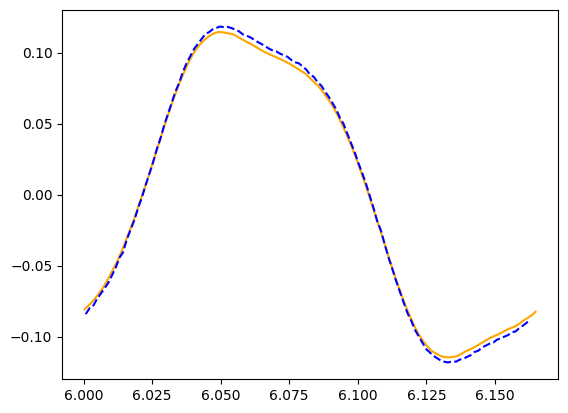

num:14, case:1


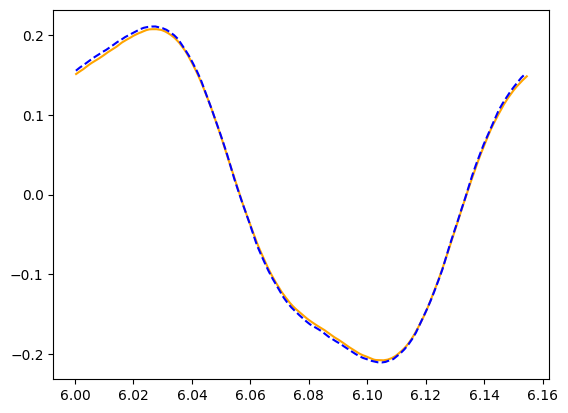

num:14, case:2


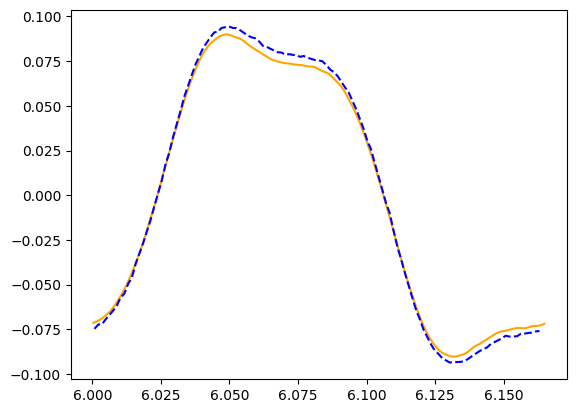

num:15, case:1


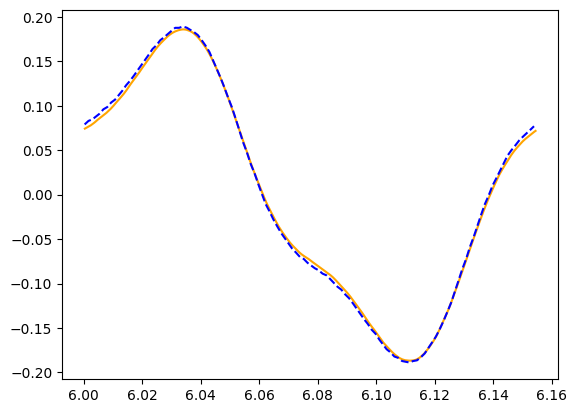

num:15, case:2


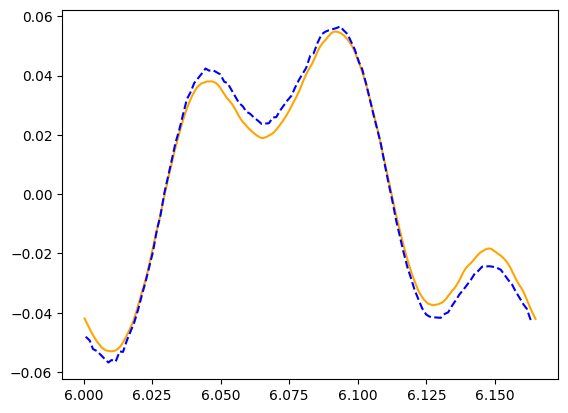

num:16, case:1


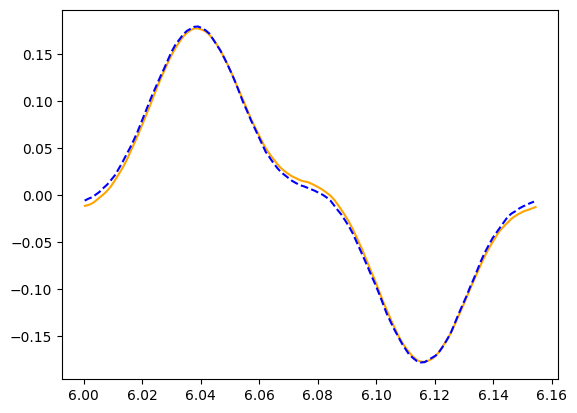

num:16, case:2


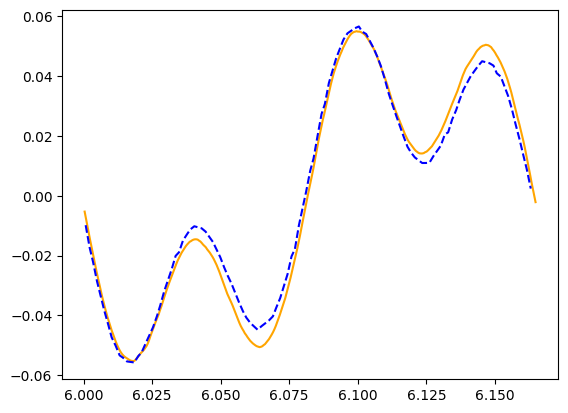

num:17, case:1


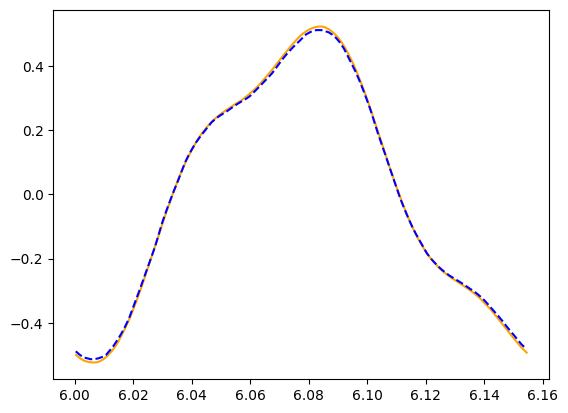

num:17, case:2


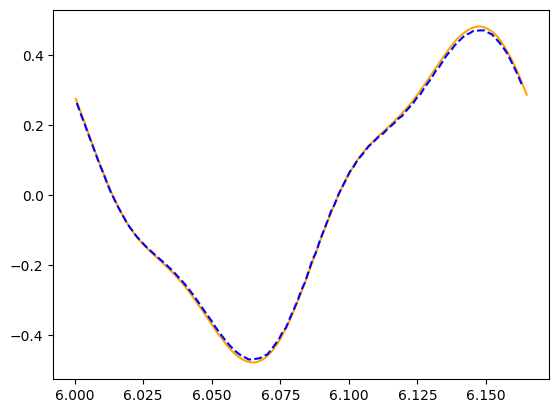

In [17]:
for num in range(1, 18):
    for case in range(1,3):
        if case==1:
            T = 1/(0.5 * (261.39 / 1.57) ** 0.5)
        elif case==2:
            T = 1/(0.5 * (230.67 / 1.57) ** 0.5)
        time_data, cl_data = find_cl_data(num, case, time_init=time_init, T=T, param_adim=param_adim, r=0.025/2)
        time_true, cl_true = true_cl(num, case, time_init, time_max=time_init+T)
        plt.plot(time_true, cl_true, color='orange')
        plt.plot(time_data, cl_data, linestyle='--', color='blue')
        print(f"num:{num}, case:{case}")
        plt.show()

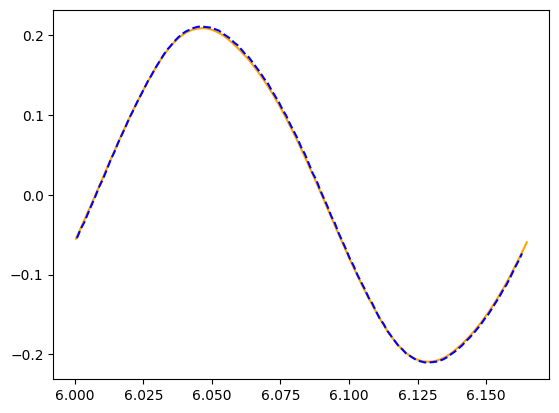

In [14]:

plt.plot(time_true, cl_true, color='orange')
plt.plot(time_data, cl_data, linestyle='--', color='blue')